In [1]:
import scanpy as sc
from subtype_analysis import *

In [2]:
dataset = "Xenium_Prime_Human_Ovary_FF"
ad = sc.read_h5ad("E:/SZ/Results/" + dataset + "/" + dataset + "_GWT_anndata.h5ad")
ad

AnnData object with n_obs × n_vars = 1110302 × 5001
    obs: 'cell_id', 'transcript_counts', 'control_probe_counts', 'genomic_control_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'nucleus_count', 'segmentation_method', 'region', 'z_level', 'cell_labels', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_10_genes', 'pct_counts_in_top_20_genes', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_150_genes', 'n_counts', 'n_genes', 'Kmeans_Raw', 'leiden_Raw_res0.4', 'leiden_Raw_res0.6', 'leiden_Raw_res0.8', 'leiden_Raw_res1', 'leiden_Raw_res1.2', 'leiden_Raw_res1.5', 'leiden_Raw_res2', 'Kmeans_scale0.01', 'leiden_scale0.01_res0.4', 'leiden_scale0.01_res0.6', 'leiden_scale0.01_res0.8', 'leiden_scale0.01_res1', 'leiden_scale0.01_res1.2', 'leiden_scale0.01_res1.5', 'leiden_scale0.01_res2', 'Kmeans_scale0.6', 'leiden_scale0.6_res0.4', 'leiden_scale0.6_res0.6', 'l

c:\Users\fyh\miniconda3\envs\pycogaps\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1154: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter([], [], c=palette[label], label=label)


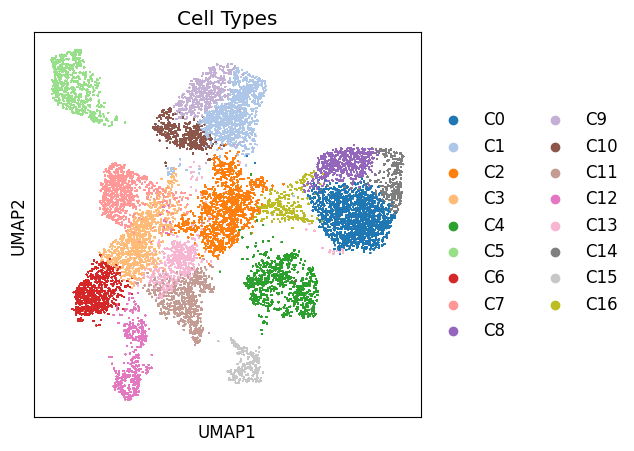

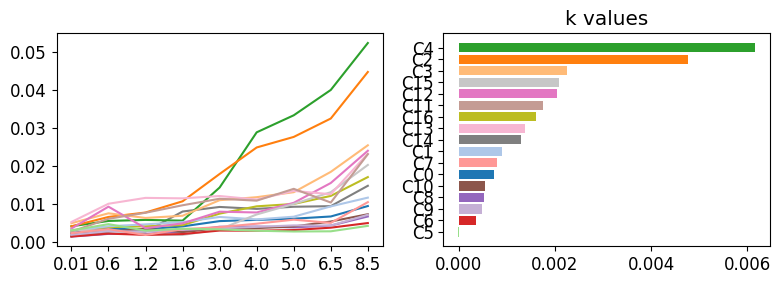

In [3]:
save_path = "./results/" + dataset + "/"
cluster_key = 'leiden_Raw_res1'
umap_keys, var_dict, k_dict, selected_cluster_recommend = calculate_metrics(ad=ad, save_path=save_path, cluster_key=cluster_key)

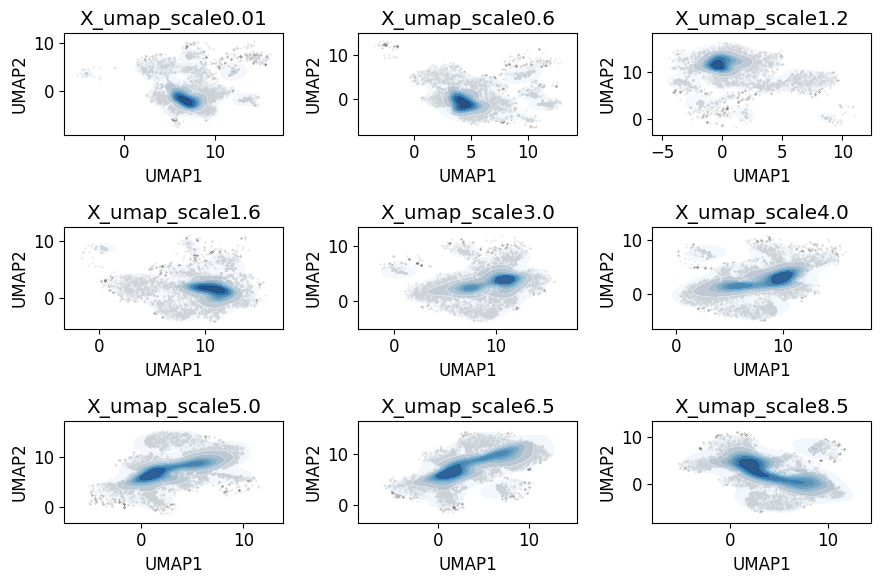

In [4]:
# selected_cluster = selected_cluster_recommend
selected_cluster = "C3"    # define the cluster you want to analyze here

ad_selected = ad[ad.obs[cluster_key] == selected_cluster]
kde_plot(ad_selected=ad_selected, save_path=save_path)

In [5]:
optimal_scale = find_optimal_scale(var_dict[selected_cluster], umap_keys=umap_keys)
print("optimal_scale: ", optimal_scale)

optimal_scale:  3.0


In [6]:
# optimal_scale = 4.5 # manually set the optimal scale here
ad_selected_plot, ward_list = detect_subclusters(ad_selected=ad_selected, save_path=save_path, optimal_scale=optimal_scale)

c:\Projects\spatialzoomer\code\subtype_analysis.py:216: ImplicitModificationWarning: Setting element `.obsm['X_umap']` of view, initializing view as actual.
  ad_selected.obsm['X_umap'] = ad_selected.obsm['X_umap_scale' + str(optimal_scale)]


MemoryError: Unable to allocate 60.7 GiB for an array with shape (90273, 90273) and data type float64